Importing Dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Data loading

In [2]:
wine = pd.read_csv('winequality.csv')

Statistical Measure



In [62]:
df = wine.copy()

In [6]:
df.shape

(1599, 12)

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.isnull().sum()

Correlation check

In [12]:
wine_correlate = df.corr()

<Axes: >

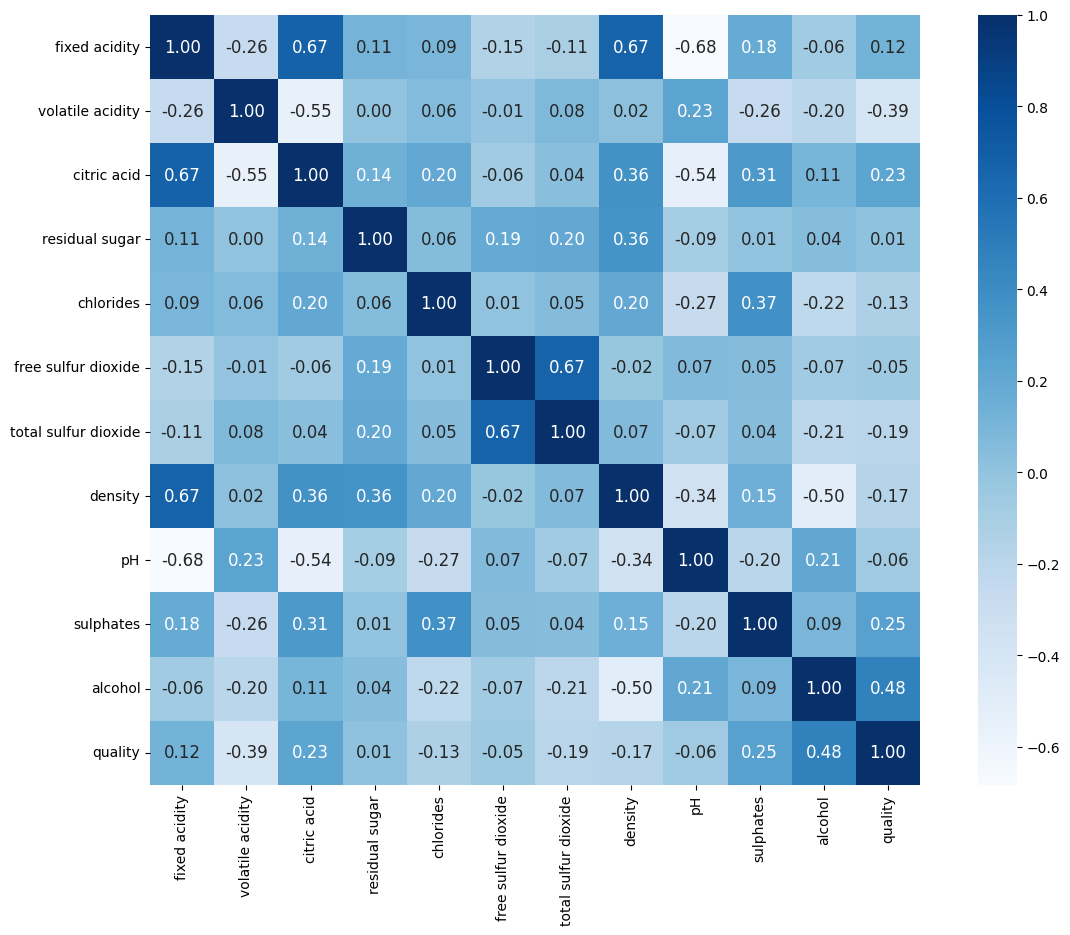

In [75]:
plt.figure(figsize=(15,10))
sns.heatmap(wine_correlate,cbar=True,square=True,annot=True,fmt='.2f',annot_kws={'size':12},cmap='Blues')

Visualizing target variable

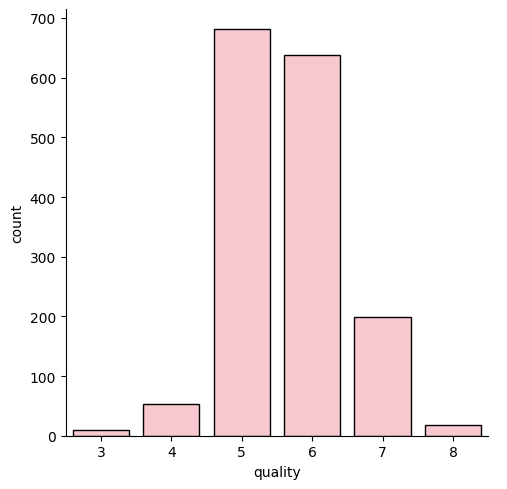

In [74]:
sns.catplot(x='quality',data = df, kind= 'count',edgecolor='black', color='pink')

In [40]:
feature_list = list(df.columns)
feature_list = feature_list[:-1]
print(feature_list)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


Visualizing relation of all feature variable with the target variable

[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
 <Axes: > <Axes: > <Axes: > <Axes: >]
[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701), (0.8836443049112893, 0.5240073524369634, 0.19569304285113343), (0.710130687316902, 0.6046852192663268, 0.19426060163712158), (0.5432776721247529, 0.6540981095185215, 0.19324494273892204), (0.19592059105779686, 0.6981620017487838, 0.3452219818913641), (0.2067117296964458, 0.6829103404254792, 0.5829988925822328), (0.21420912437215422, 0.6714963557258681, 0.6986206664203177), (0.22537170008202412, 0.6531400148480775, 0.841007805313343), (0.5596943802099308, 0.5764402169887779, 0.9583930713150347), (0.8578978803740231, 0.44058452715322166, 0.957819659566579), (0.9628653850704806, 0.4025928454059796, 0.7779310354076443)]


<ipython-input-76-b6af17e2a436>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality',y=feature,data=df,ax=axes[i],palette=[colors[i]])
<ipython-input-76-b6af17e2a436>:7: UserWarning: 
The palette list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='quality',y=feature,data=df,ax=axes[i],palette=[colors[i]])
<ipython-input-76-b6af17e2a436>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality',y=feature,data=df,ax=axes[i],palette=[colors[i]])
<ipython-input-76-b6af17e2a436>:7: UserWarning: 
The palette list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplo

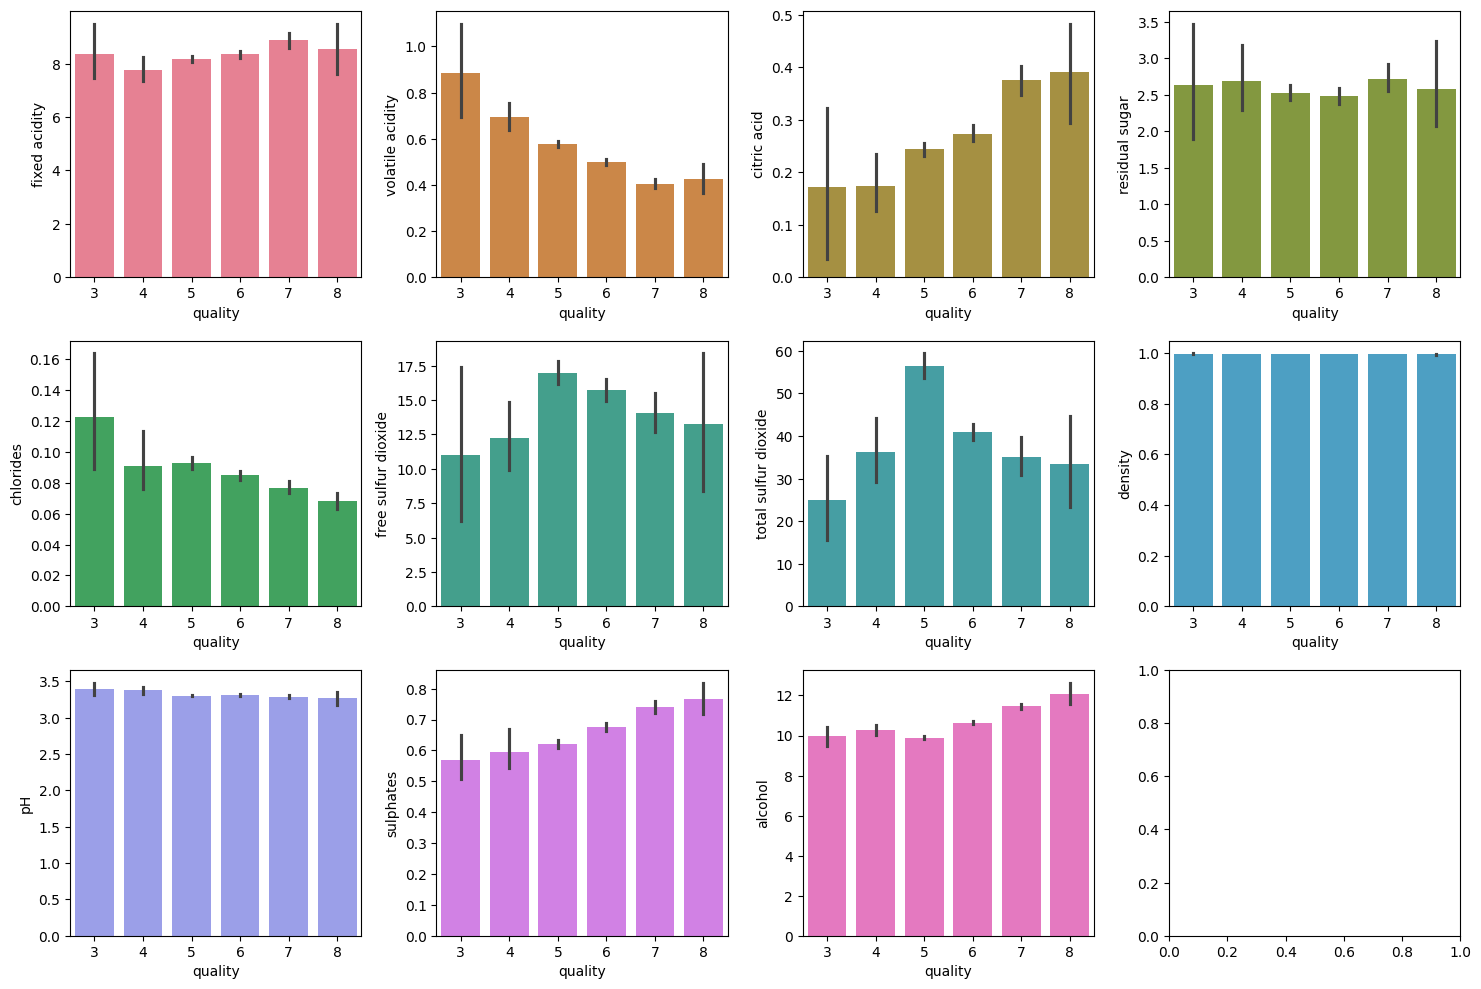

In [76]:
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.flatten()
print(axes)
colors = sns.color_palette("husl", len(feature_list))
print(colors)
for i,feature in enumerate(feature_list):
    sns.barplot(x='quality',y=feature,data=df,ax=axes[i],palette=[colors[i]])
plt.tight_layout()
plt.show()

Seperating Data

In [63]:
X = df.drop(columns='quality',axis=1)


Label Binarization: To convert all wine quality into either good or bad. So lets say if quality is 7 or avobe then it is good or else the wine quality is bad

In [64]:
  Y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

Train Test Split

In [65]:
Xlearn, Xexam, Ylearn, Yexam = train_test_split(X,Y, test_size=0.2,stratify=Y,random_state=3)

In [66]:
print(X.shape,Xlearn.shape,Xexam.shape)

(1599, 11) (1279, 11) (320, 11)


Model loading

In [67]:
randomModel = RandomForestClassifier()

Model Training

In [68]:
randomModel.fit(Xlearn,Ylearn)

RandomForestClassifier()

Model Evaluation

In [70]:
##Training
Ylearn_predict = randomModel.predict(Xlearn)
Accuracy_score_learn = accuracy_score(Ylearn_predict,Ylearn)

##Testing
Yexam_predict = randomModel.predict(Xexam)
Accuracy_score_exam = accuracy_score(Yexam_predict,Yexam)


print(f'The accuracy score for training:{Accuracy_score_learn}')
print(f'The accuracy score for tesing:{Accuracy_score_exam}')

The accuracy score for training:1.0
The accuracy score for tesing:0.90625


Making predictive system

In [ ]:
input = X.iloc[:1,:]

prediction = randomModel.predict(input)
if prediction ==1:
  print('The wine is good')
else:
  print('The wine is bad')